<h3>Data Processing With Scikit Learn</h3>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 8]
sns.set_style('darkgrid')

In [3]:
titanic_data = sns.load_dataset('titanic')
titanic_data.head(30)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [4]:
titanic_data = titanic_data[['age', 'fare', 'pclass']]
titanic_data.head(30)

,age,fare,pclass
0,22.0,7.2500,3
1,38.0,71.2833,1
2,26.0,7.9250,3
3,35.0,53.1000,1
4,35.0,8.0500,3
5,NaN,8.4583,3
6,54.0,51.8625,1
7,2.0,21.0750,3
8,27.0,11.1333,3
9,14.0,30.0708,2


In [5]:
titanic_data.describe()

,age,fare,pclass
count,714.000000,891.000000,891.000000
mean,29.699118,32.204208,2.308642
std,14.526497,49.693429,0.836071
min,0.420000,0.000000,1.000000
25%,20.125000,7.910400,2.000000
50%,28.000000,14.454200,3.000000
75%,38.000000,31.000000,3.000000
max,80.000000,512.329200,3.000000


<p>Standard Scaling</p>

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
scaler.fit(titanic_data)

titanic_data_scaled = scaler.transform(titanic_data)

In [11]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns=titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,-0.530377,-0.502445,0.827377
1,0.571831,0.786845,-1.566107
2,-0.254825,-0.488854,0.827377
3,0.365167,0.420730,-1.566107
4,0.365167,-0.486337,0.827377


<Axes: xlabel='age', ylabel='Density'>

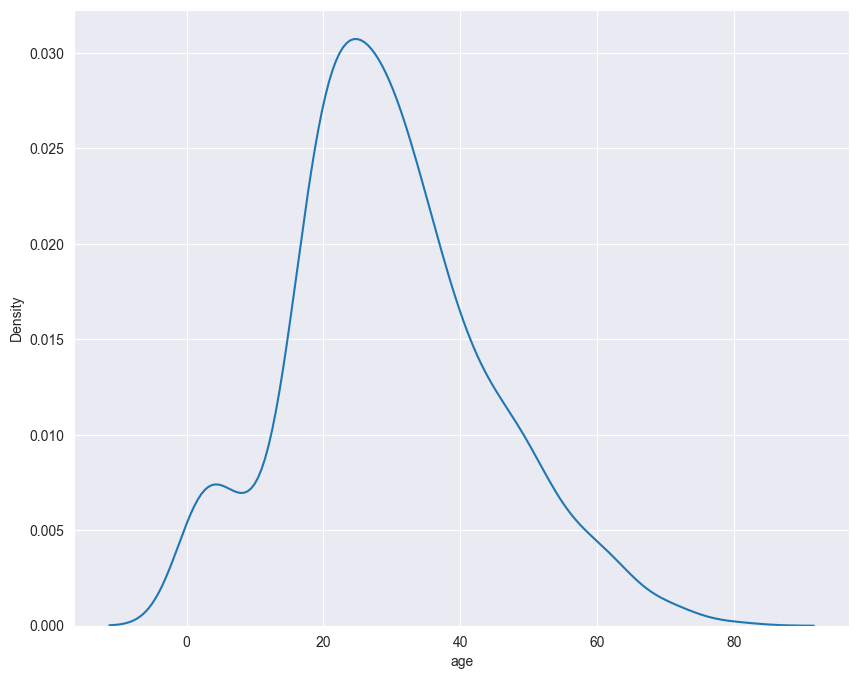

In [12]:
sns.kdeplot(titanic_data['age'])

<Axes: xlabel='age', ylabel='Density'>

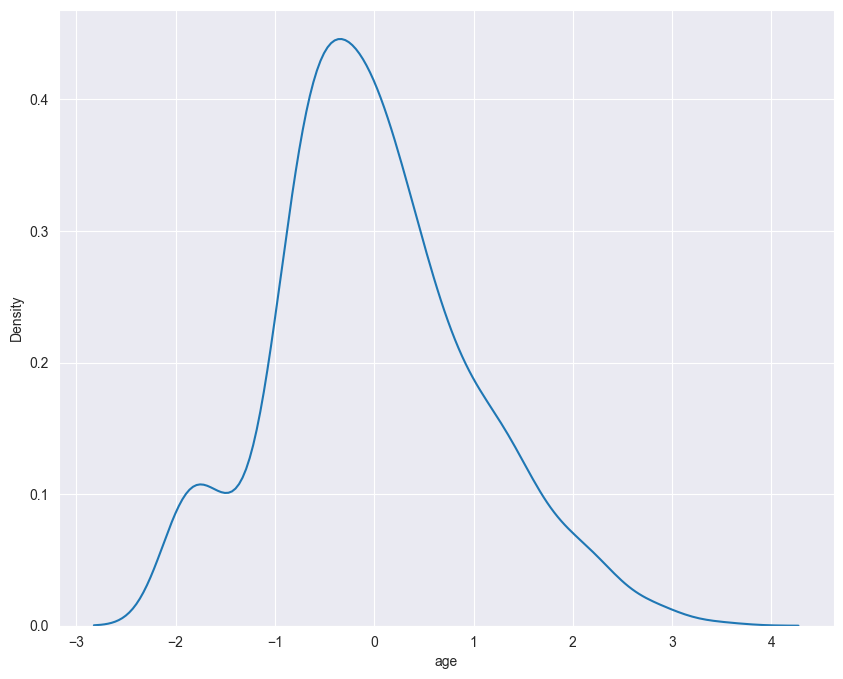

In [13]:
sns.kdeplot(titanic_data_scaled['age'])